# Get the data

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

df=pd.read_csv("B000SMN0DO - Dandy Blend, Instant Herbal Beverage with Dandelio 2022-02-24.csv")
df.head()

,Date,Author,Verified,Helpful,Title,Body,Rating,Images,Videos,URL,Variation,Style
0,"Reviewed in the United States on July 9, 2012",Pampeliska,-,yes,"Another ""thumbs up"" review plus some storage t...",Much has been written about how great this pro...,5,-,-,https://www.amazon.com/gp/customer-reviews/R2H...,B000SMN0DO,Size: 2 Pound (Pack of 1)
1,"Reviewed in the United States on May 8, 2018",SC,yes,yes,Delicious!,I discovered Dandy Blend when i was forced (fo...,5,-,-,https://www.amazon.com/gp/customer-reviews/R1O...,B000SMN0DO,Size: 2 Pound (Pack of 1)
2,"Reviewed in the United States on May 9, 2016",MsKahuna,yes,yes,Proceed with caution if you have problems with...,I found out after trying this as a morning bev...,3,-,-,https://www.amazon.com/gp/customer-reviews/R3P...,B000SMN0DO,Size: 2 Pound (Pack of 1)
3,"Reviewed in the United States on June 3, 2016",O. Bouvier,yes,yes,THIS PRODUCT IS NOT GLUTEN FREE!,FOR ANYONE WITH GLUTEN SENSITIVITY OR CELIAC D...,1,-,-,https://www.amazon.com/gp/customer-reviews/R15...,B005P0XDJK,Size: 7.05 Ounce (Pack of 1)
4,"Reviewed in the United States on June 22, 2018",Mishka Haznor,yes,yes,I already know if I am going to like the coffe...,I am a really picky person when it comes to co...,5,-,-,https://www.amazon.com/gp/customer-reviews/R3T...,B000SMN0DO,Size: 2 Pound (Pack of 1)


In [2]:
term_df = df.Body.apply(str)
term_df = term_df.apply(str.lower)
term_df = pd.DataFrame(term_df)
term_df['Body'] = term_df['Body'].str.split()
term_df = term_df.explode("Body")
term_df.head()

,Body
0,much
0,has
0,been
0,written
0,about


In [3]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
words = " ".join(term_df.Body)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, colormap='tab10', stopwords=stop_words).generate(words)

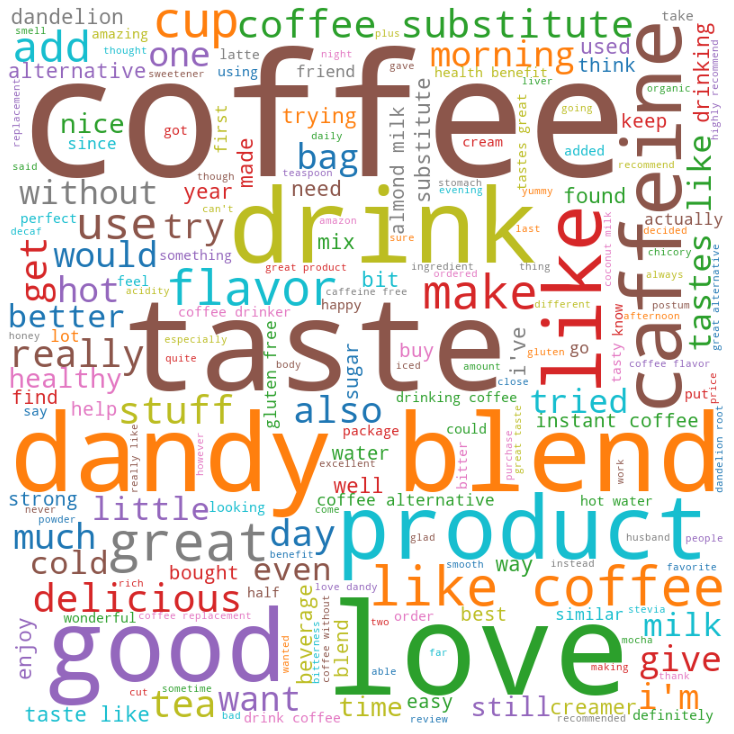

In [5]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.savefig('word_cloud')
plt.show()